In [1]:
# import exploratory data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scikit-learn modules
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [2]:
# load data into dataframe
df1 = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

# check shape and dtypes of columns
print(df1.shape, "\n")
print(df1.info())

(891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# look at summary stats for columns
print(df1.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [4]:
# examine sample of df1
print(df1.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


/tmp/ipykernel_30716/1584718532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df1, palette=['royalblue', 'firebrick'])


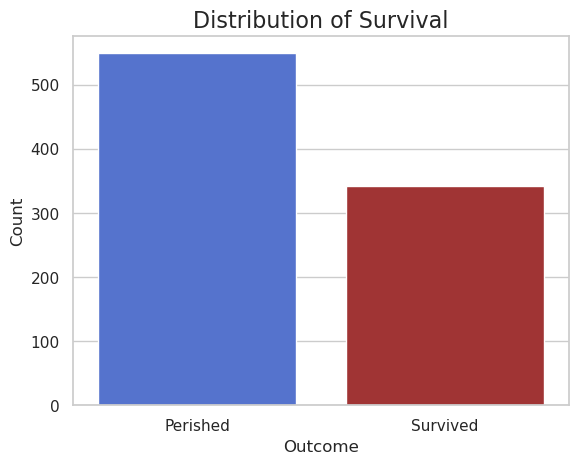

In [59]:
# visualise the shape of our target variable: Survived
sns.countplot(x='Survived', data=df1, palette=['royalblue', 'firebrick'])
labels = ['Perished', 'Survived']
plt.title('Distribution of Survival', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], labels)
plt.show()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64


/tmp/ipykernel_30716/3744897966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MissingCount', y='Column', data=missing_df, palette="viridis")


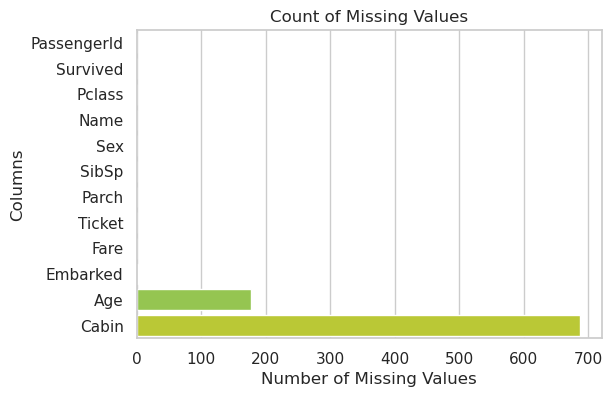

In [44]:
# check for missing values
missing_count = df1.isna().sum().sort_values()
print(missing_count)

# change Series into DataFrame to plot
missing_df = missing_count.reset_index()
missing_df.columns = ['Column', 'MissingCount']

# create a bar plot of missing values
plt.figure(figsize=(6, 4))
sns.barplot(x='MissingCount', y='Column', data=missing_df, palette="viridis")
plt.title('Count of Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [6]:
"""old label encoding code, did not end up using"""
# # label encode categorical variables to see correlation
# label_encoder = preprocessing.LabelEncoder()

# # apply label encoding to categorical columns
# for col in df_copy.select_dtypes(include=['object']).columns:
#     df_copy[col] = label_encoder.fit_transform(df_copy[col])

"""Creae correlation matrix"""
# create temporary copy to use in correlation matrix
df_copy = df1.copy()

# select numeric values from dataframes
numeric_df = df_copy.select_dtypes(include=[int, float])

# create correlation matrix

correlation_matrix = numeric_df.corr()
print(correlation_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


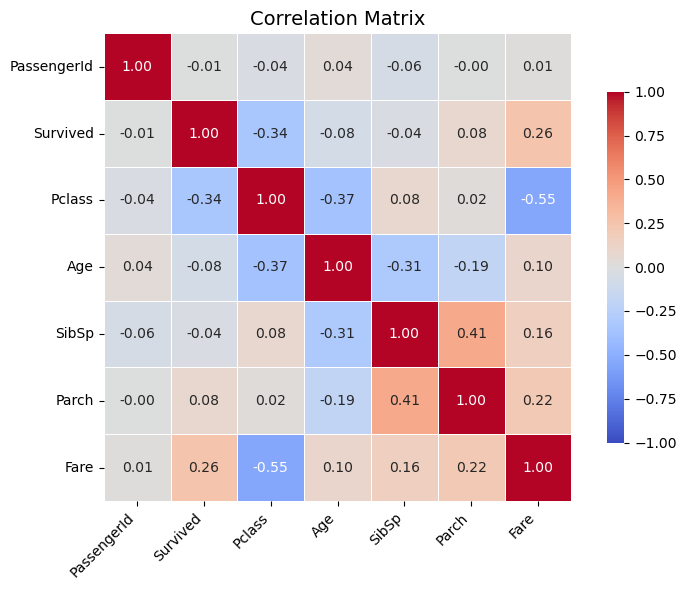

In [7]:
# set up the matplotlib figure
plt.figure(figsize=(8, 6))

# create a heatmap with better aesthetics
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

# add title and labels
plt.title('Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [8]:
"""Deal with missing values """

# drop missing values in embarked column as 2 rows is <5% of dataset
df2 = df1.dropna(subset=['Embarked'])

# too many missing values in the cabin column, dropping it completely
df2 = df2.drop(columns=['Cabin'])

# fill in median for age column
median_age = df2['Age'].median()
df2['Age'] = df2['Age'].fillna(median_age)

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [9]:
# check for missing values again
print(df2.isna().sum().sort_values())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


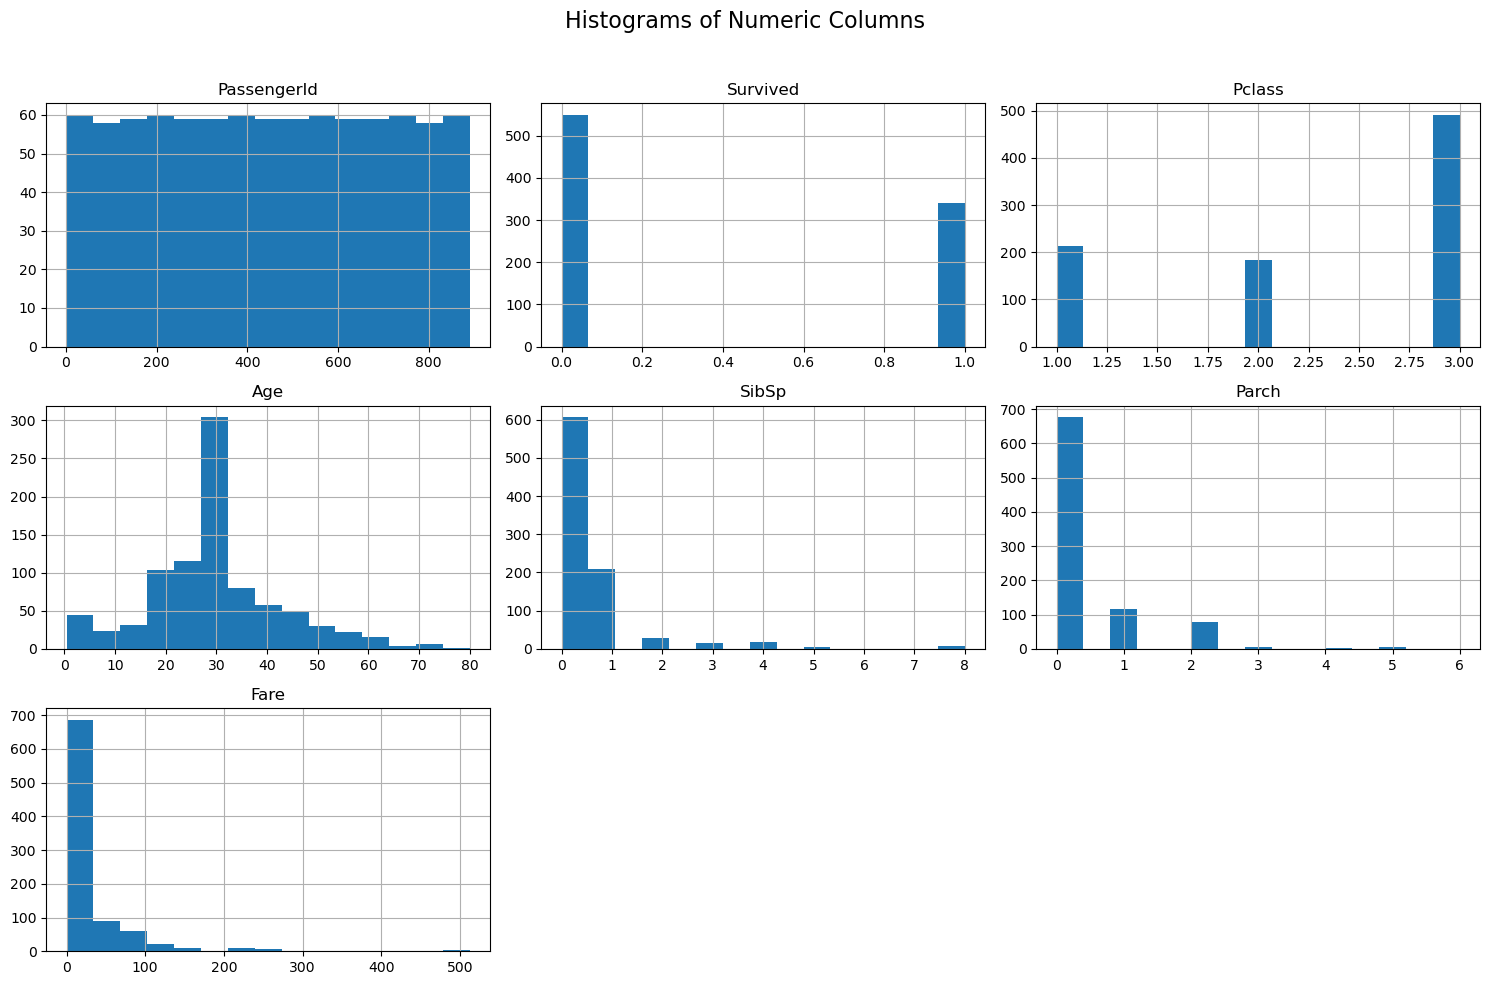

In [10]:
# make copy of df2
df2_copy = df2.copy()

# select numeric columns
numeric_columns = df2_copy.select_dtypes(include=[int, float]).columns

# create histograms for numeric columns
df2_copy[numeric_columns].hist(bins=15, figsize=(15, 10))

plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

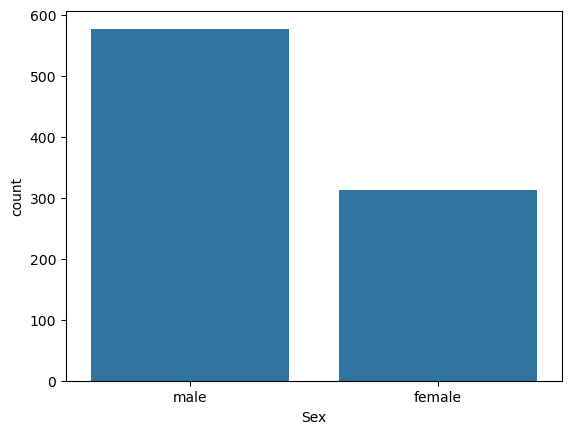

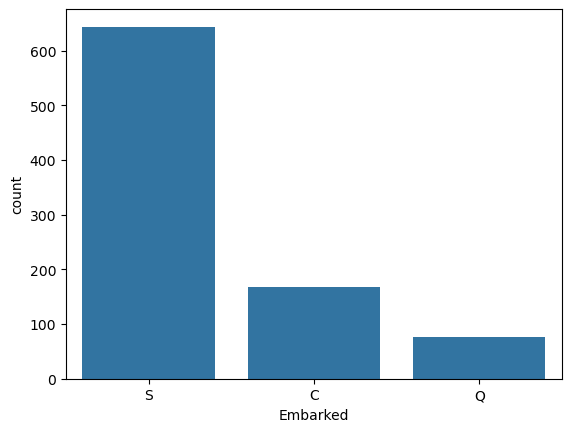

In [11]:
# visualise frequency of categorical columns as barplot
categorical_cols = df2_copy[['Sex', 'Embarked']]

# keep embarked and sex columns, try ticket unique

for col in categorical_cols:
    sns.countplot(x=col, data=df2_copy)
    plt.show()

In [12]:
print(df2.describe(include=('all')))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    889.000000  889.000000  889.000000                  889   889   
unique          NaN         NaN         NaN                  889     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.382452    2.311586                  NaN   NaN   
std      256.998173    0.486260    0.834700                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      224.000000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.000000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare Embarked  
count   889.000000  889.000000  889

In [13]:
"""One-hot encode categorical variable columns """

cat_cols = df2.select_dtypes(include=['object']).columns

# one hot encode cat columns and drop any missing values
df3 = pd.get_dummies(df2, columns=cat_cols, drop_first=True)
df3.dropna()

# check shape and scale of new df3
print(df2.shape)
print(df3.shape)
print("\n", df3.describe())

(889, 11)
(889, 1577)

        PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.315152    0.524184   
std     256.998173    0.486260    0.834700   12.984932    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [14]:
"""Model training:
   1. Train/test split. 
   2. Create a pipeline that scales using minmax, standard and robust scaler
   3. models used in pipeline: logistic regression, SVM, KNN, decision tree and voting classifer ensemble
   3. use GridSearchCv to assess best hyperparameters and best performing models
   4. compute precision, confusion matrix, F1 score and put them in a data frame and visualisation.
 """

'Model training:\n   1. Train/test split. \n   2. Create a pipeline that scales using minmax, standard and robust scaler\n   3. models used in pipeline: logistic regression, SVM, KNN, decision tree and voting classifer ensemble\n   3. use GridSearchCv to assess best hyperparameters and best performing models\n   4. compute precision, confusion matrix, F1 score and put them in a data frame and visualisation.\n '

In [15]:
# create our array of features, X
X = df3.drop(columns=['Survived'])

# create our array of our target variable, y
y = df3['Survived']

# split data into train/test split of 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (622, 1576)
X_test shape: (267, 1576)
y_train shape: (622,)
y_test shape: (267,)


In [16]:
"""Setting up a pipeline to:
1. scale using StandardScaler (Z-scores using mean), RobustScaler (centered around median) and MinMaxSacler
2. using logistic regression, KNN, support vector classifier, a decision tree classifier and a voting classifier ensmble of all these models
3. using k-fold cross-validation then comparing classification metrics: accuracy, precision, recall and F1-score, as well as a confusion matrix
"""

# define the models, scalers and hyper-paramaeters to try
parameter_grid = [
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [LogisticRegression()],
        'model__C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf']
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 3, 6, 9, 12],
        'model__min_samples_split': [2, 8, 16]
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [KNN()],
        'model__n_neighbors': [2, 4, 6, 8, 10],
        'model__weights': ['uniform', 'distance']
    },
        # Add the VotingClassifier here
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [VotingClassifier(
            estimators=[
                ('lr', LogisticRegression()),
                ('svc', SVC(probability=True)),
                ('dt', DecisionTreeClassifier()),
                ('knn', KNN())
            ])
        ],
        'model__voting': ['hard', 'soft'],
        'model__weights': [None, [1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]]
    }
]


# store results of each model
results = []

for params in parameter_grid:
    # store model name as a variable
    model_name = type(params['model'][0]).__name__

    # create Pipeline formatting to structure GridSearchCV
    pipeline = Pipeline([
        ('scaler', params['scaler'][0]),
        ('model', params['model'][0])
    ])

    # use GridSearch cross-validation with k=10
    grid_search = GridSearchCV(pipeline, params, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # get the best pipeline and make predictions on our test set
    best_pipeline = grid_search.best_estimator_
    y_prediction = best_pipeline.predict(X_test)

    # define our accuracy, precision, recall, f1_score
    best_cv_accuracy = grid_search.best_score_
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)

    # store results
    results.append({
        'Model:': model_name,
        'Test Accuracy:': best_cv_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F-1 Score': f1,
        'Best Hyperparamters': grid_search.best_params_,
    })

# results DataFrame
results_df = pd.DataFrame(results)

# print comparison of all models
print("\nComparison of all models:")
print(results_df.to_string(index=False))

# Find and print the best overall model
best_model = results_df.loc[results_df['Test Accuracy:'].idxmax()]
print("\nBest Overall Model:")
print(best_model.to_string())


Comparison of all models:
                Model:  Test Accuracy:  Test Precision  Test Recall  Test F-1 Score                                                                                                                                                                                                                                                                                                                                 Best Hyperparamters
    LogisticRegression        0.823118        0.747475         0.74        0.743719                                                                                                                                                                                                                                                                           {'model': LogisticRegression(), 'model__C': 10, 'scaler': MinMaxScaler()}
                   SVC        0.829595        0.790698         0.68        0.731183                                          


Confusion Matrix:
[[145  22]
 [ 32  68]]


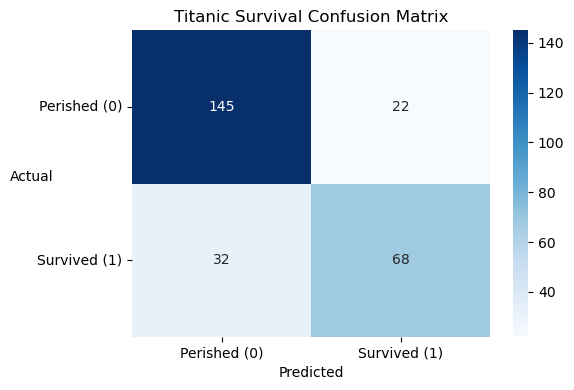

In [17]:
"""Heatmap of confusion matrix"""

# create and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
print('\nConfusion Matrix:')
print(conf_matrix)

class_labels = ['Perished (0)', 'Survived (1)']

# create heatmap of confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Titanic Survival Confusion Matrix')
plt.yticks(rotation=360)
plt.ylabel('Actual', rotation=360)
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [18]:
"""Visualisation of model scores
1. Display target feature as bar chart earlier
2. Display bar chart of metrics: accuracy, precision, recall, f-1 score, each bar represents a different model
"""

'Visualisation of model scores\n1. Display target feature as bar chart earlier\n2. Display bar chart of metrics: accuracy, precision, recall, f-1 score, each bar represents a different model\n'

/tmp/ipykernel_30716/4241946932.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
/tmp/ipykernel_30716/4241946932.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
/tmp/ipykernel_30716/4241946932.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
/tmp/ipykernel_30716/4241946932.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')


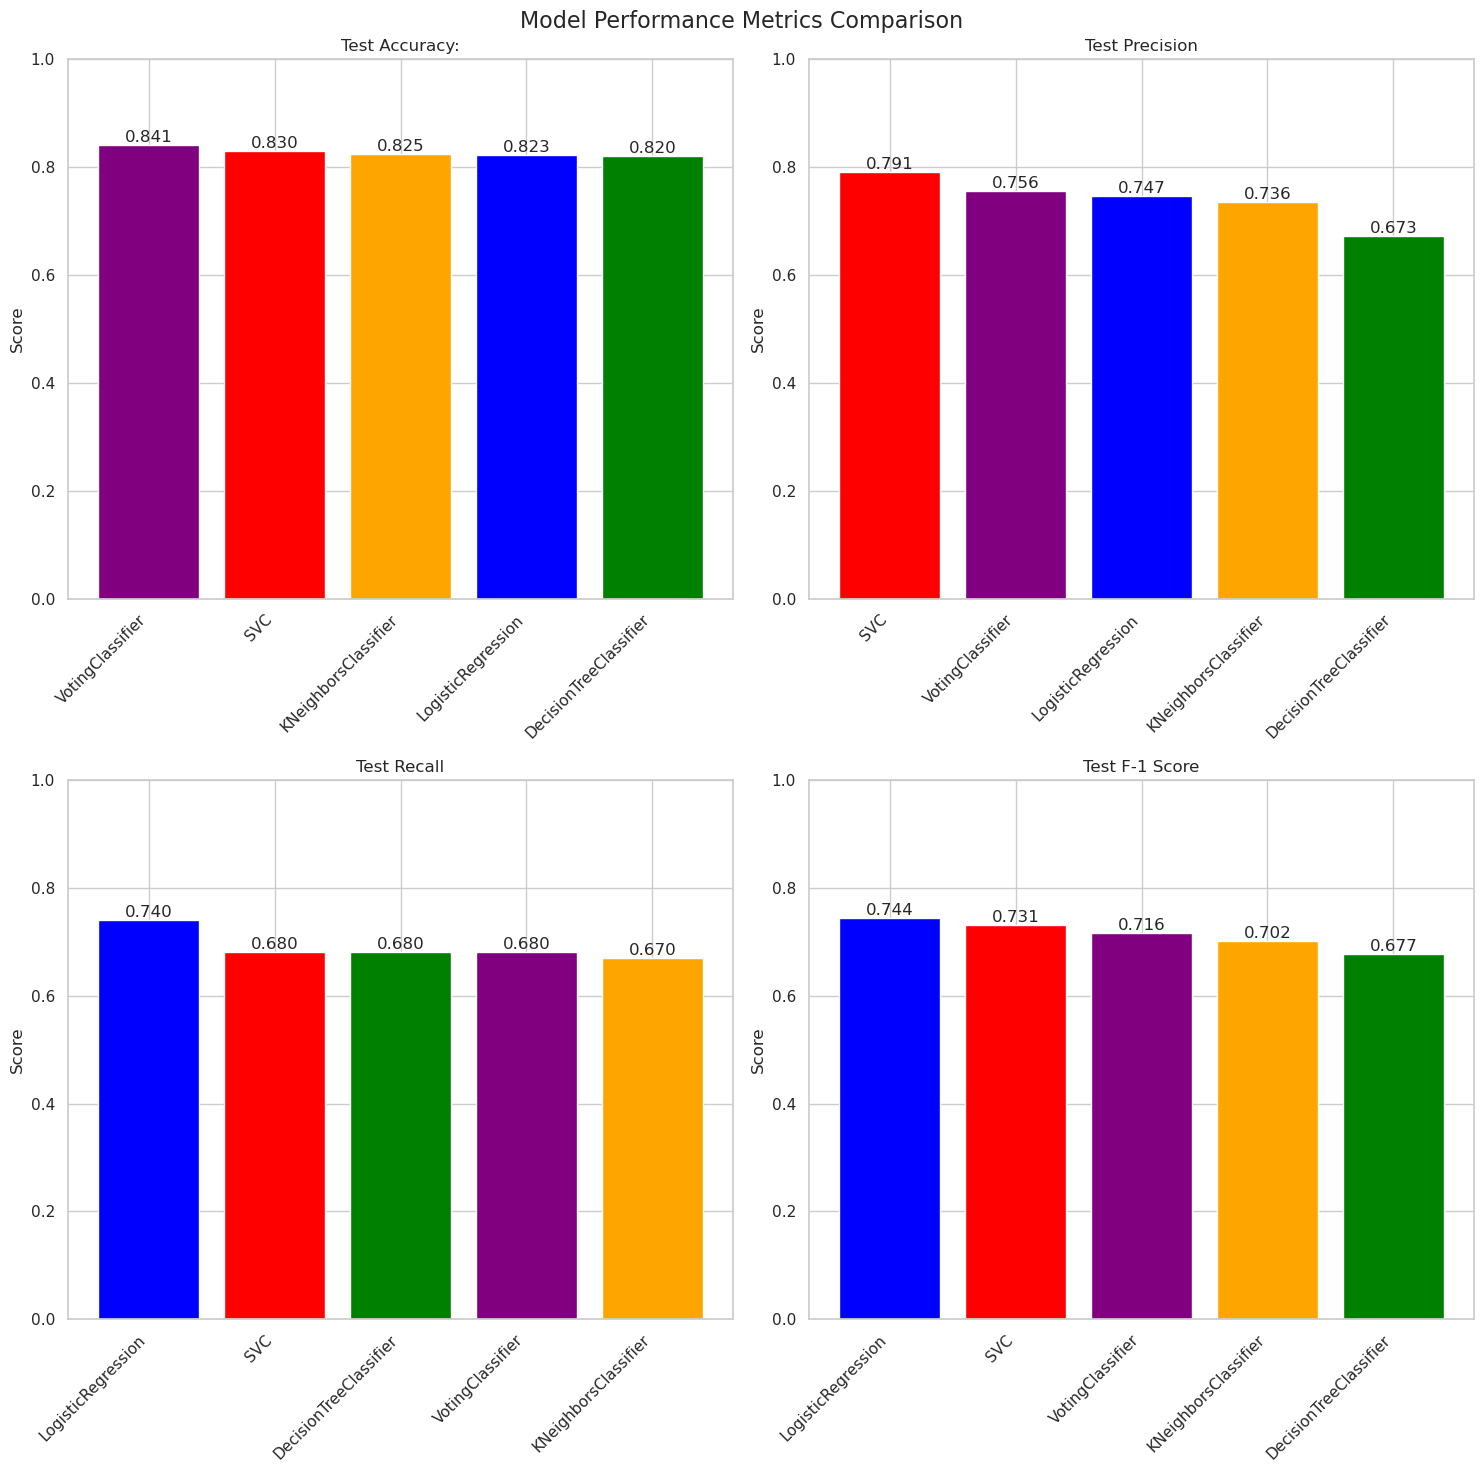

In [ ]:
# create figure and axes, flatten for easier iteration
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)
axes = axes.flatten()

# define list of titles for plots (metrics)
metrics = ['Test Accuracy:', 'Test Precision', 'Test Recall', 'Test F-1 Score']

# define a color for each a bar correspondign to a model
model_colors = {
    'SVC': 'red',
    'LogisticRegression': 'blue',
    'DecisionTreeClassifier': 'green',
    'KNeighborsClassifier': 'orange',
    'VotingClassifier': 'purple'
}

# function to get color from model_colors to match bars to models on different plots
def get_color(model):
    return model_colors.get(model.split('(')[0], None)

for ax, metric in zip(axes, metrics):
    # sorts results_df by current metric in descending order
    sorted_df = results_df.sort_values(metric, ascending=False)
    
    # create bar plots using sorted results_df
    bars = ax.bar(sorted_df['Model:'], sorted_df[metric], 
                  color=[get_color(model) for model in sorted_df['Model:']])
    ax.set_title(metric)
    ax.set_ylim(0, 1) # set limit from 0 to 1
    ax.set_ylabel('Score')
    ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
    
    # add value labels above each bar
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{bar.get_height():.3f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()